In [ ]:
!pip install gensim
!pip install matplotlib
!pip install pandas
!pip install wordcloud

In [2]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
documents = [
    "This is the first document about topic modeling.",
    "Topic modeling is a powerful technique to extract insights from text.",
    "Gensim is a popular library for topic modeling in Python.",
    "In this workshop, we will learn how to use Gensim for topic modeling.",
    "Latent Dirichlet Allocation (LDA) is a probabilistic model.",
    "We will visualize the topics using matplotlib.",
]

In [4]:
# Tokenize and create dictionary
tokenized_documents = [gensim.utils.simple_preprocess(doc) for doc in documents]
dictionary = corpora.Dictionary(tokenized_documents)

# Create corpus
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]


In [5]:
# Train the LDA model
num_topics = 3  # You can change this based on the number of topics you want to extract
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)


In [6]:
# Calculate coherence score
coherence_model = CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score:.2f}")


Coherence Score: 0.30


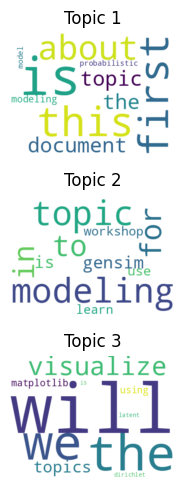

In [10]:
from wordcloud import WordCloud

# Visualization
topics = lda_model.show_topics(num_topics=num_topics, formatted=False)

fig, axes = plt.subplots(nrows=num_topics, figsize=(5, 5), dpi=100)
for i, (topic, keywords) in enumerate(topics):
    keywords = dict(keywords)
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(keywords)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f"Topic {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()